Factor Analysis

In [74]:
# import libraries
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [76]:
# import data
input_file = "case_study_1_michigan_suburban.csv"
df = pd.read_csv(input_file, header=None, sep=",")

# assign headers
df.columns = ['control point 1', 'control point 2', 'control point 3', 'sill height', 'head height', '% opaque panels', 
       'building rotation','south VT', 'south u-value', 'south SHGC', 'east VT', 'east u-value','east SHGC', 'north VT',
              'north u-value', 'north SHGC', 'west VT', 'west u-value', 'west SHGC', 'heating', 'cooling', 'lighting', 'constraint', 'EUI',
              'SF', 'v26','v27']

# dropping unnecessary columns
df.drop(['heating', 'cooling', 'lighting', 'constraint', 'EUI', 'SF','v26','v27'],axis=1,inplace=True)

# show info on dataframe
df.info()

# display datframe with headers
#df.head()

# compute the minimum value per feature on the dataset
min_on_dataset = df.min(axis=0)

# compute the range of each feature (max - min) on the training set
range_on_dataset = (df - min_on_dataset).max(axis=0)

# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
df_scaled = (df - min_on_dataset) / range_on_dataset

# show info on dataframe
#df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   control point 1    1000 non-null   float64
 1   control point 2    1000 non-null   float64
 2   control point 3    1000 non-null   float64
 3   sill height        1000 non-null   float64
 4   head height        1000 non-null   float64
 5   % opaque panels    1000 non-null   float64
 6   building rotation  1000 non-null   float64
 7   south VT           1000 non-null   float64
 8   south u-value      1000 non-null   float64
 9   south SHGC         1000 non-null   float64
 10  east VT            1000 non-null   float64
 11  east u-value       1000 non-null   float64
 12  east SHGC          1000 non-null   float64
 13  north VT           1000 non-null   float64
 14  north u-value      1000 non-null   float64
 15  north SHGC         1000 non-null   float64
 16  west VT            1000 n

Bartlett's Test

In [77]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(190.15250275117964, 0.01176283879739755)

Kaiser-Meyer-Olkin (KMO) Test

In [78]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.48537302334929283

In [79]:
fa = FactorAnalyzer(rotation=None)
fa.fit(df_scaled)
fa.loadings_
fa.get_communalities()

array([0.03002039, 0.04575337, 0.03764725, 0.05118488, 0.02521113,
       0.00648971, 0.00402519, 0.00263418, 0.00201028, 0.03473677,
       0.195581  , 0.02911618, 0.12268552, 0.01351491, 0.04429243,
       0.02084767, 0.02838915, 0.15550318, 0.00906458])

Cross-Correlation Matrix

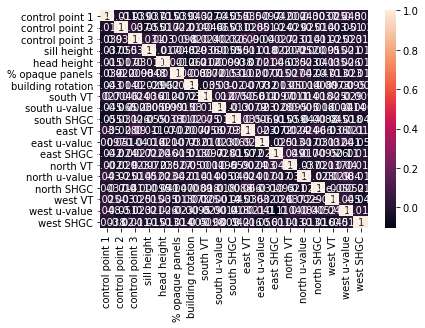

In [72]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Random Forest

In [59]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.svm import SVC

In [4]:
input_file = "case_study_1_michigan_suburban.csv"
df = pd.read_csv(input_file, header=None, sep=",")
X, y = df.iloc[:, :-8], df.iloc[:, -4]
#print(X)
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

# use THE SAME transformation on the test set,
# using min and range of the training set 
X_test_scaled = (X_test - min_on_training) / range_on_training

forest = RandomForestRegressor(n_estimators=100, random_state=2)
forest.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        forest.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test_scaled, y_test)))

Minimum for each feature
 0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
dtype: float64
Maximum for each feature
 0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
dtype: float64
Accuracy on training set: 0.979
Accuracy on test set: 0.872


Feature ranking:
1. feature 5 (0.403825)
2. feature 8 (0.234647)
3. feature 4 (0.132939)
4. feature 14 (0.109908)
5. feature 15 (0.014389)
6. feature 11 (0.014041)
7. feature 9 (0.012991)
8. feature 17 (0.008596)
9. feature 16 (0.008455)
10. feature 3 (0.006864)
11. feature 13 (0.006732)
12. feature 12 (0.006690)
13. feature 0 (0.006597)
14. feature 18 (0.006273)
15. feature 2 (0.006270)
16. feature 7 (0.006053)
17. feature 6 (0.005229)
18. feature 1 (0.004938)
19. feature 10 (0.004565)


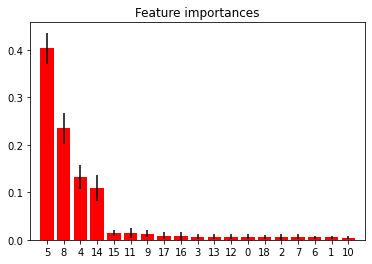

In [5]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Feature 5 is % opaque panels, feature 8 is south u-value, feature 4 is head height, feature 14 is north u-value

In [61]:
input_file = "case_study_2_texas_urban.csv"
df = pd.read_csv(input_file, header=None, sep=",")
X, y = df.iloc[:, :-7], df.iloc[:, -7]
#print(X)
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
forest = RandomForestRegressor(n_estimators=300, random_state=1)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.974
Accuracy on test set: 0.836


Feature ranking:
1. feature 7 (0.513919)
2. feature 6 (0.225590)
3. feature 18 (0.041232)
4. feature 12 (0.030743)
5. feature 21 (0.023974)
6. feature 15 (0.018198)
7. feature 5 (0.017646)
8. feature 0 (0.014700)
9. feature 22 (0.011294)
10. feature 13 (0.010011)
11. feature 14 (0.009076)
12. feature 9 (0.009049)
13. feature 16 (0.008903)
14. feature 19 (0.008832)
15. feature 11 (0.008030)
16. feature 1 (0.007141)
17. feature 17 (0.007046)
18. feature 10 (0.006653)
19. feature 8 (0.006021)
20. feature 2 (0.005838)
21. feature 4 (0.005779)
22. feature 20 (0.005604)
23. feature 3 (0.004720)


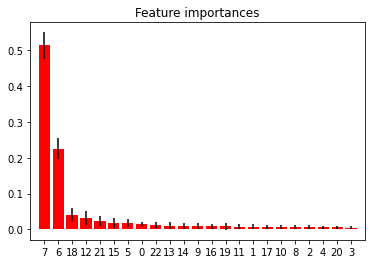

In [62]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Feature 7 is % opaque panels, feature 6 is head height